<h1>Analyse explicative des données</h1>

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

In [9]:
train=pd.read_csv(r'./train.csv')

In [10]:
data_train=pd.DataFrame(data=train)

In [4]:
data_train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [11]:
df=data_train.copy()

In [ ]:
df.shape

(8693, 14)

In [ ]:
df.dtypes.value_counts()

object     7
float64    6
bool       1
dtype: int64

Target variable : Transported </p>
<p>Lignes et colonnes : 8693 lignes et 14 colonnes </p>
<p>Types de variables: 6 float , 5 object and 3 booleen . Il faut changer le type de CryoSleep et VIP par la suite

<h2>Analyse des valeurs manquantes </h2>

<AxesSubplot:>

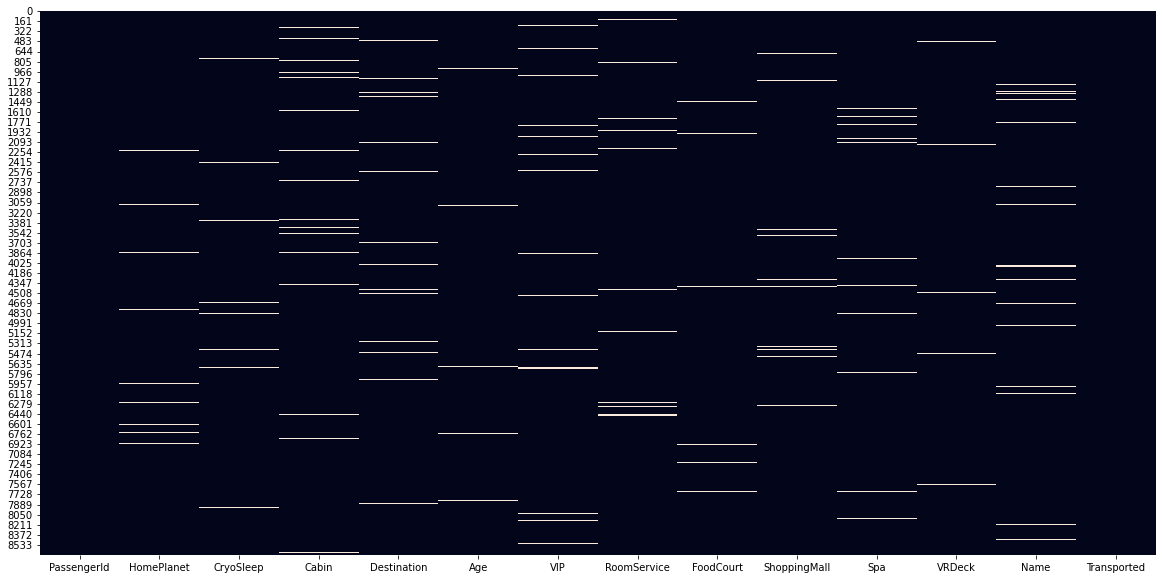

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

La couleur blanche signifie des valeurs manquantes , on peut remarquer qu'on a pas trop de valeurs manquantes

In [ ]:
#Pourcentage des valeurs manquantes dans notre dataset triés par ordre croissant
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

PassengerId     0.000000
Transported     0.000000
Age             0.020591
RoomService     0.020821
Destination     0.020936
FoodCourt       0.021051
Spa             0.021051
VRDeck          0.021627
Cabin           0.022892
Name            0.023007
HomePlanet      0.023122
VIP             0.023352
ShoppingMall    0.023927
CryoSleep       0.024963
dtype: float64

On remarque que toutes les variables ont un pourcentage de valeurs manquantes inférieur à 2.5%

In [39]:
#Elimination des colonnes inutiles
df=df.drop('PassengerId', axis = 1)
df=df.drop('Name', axis = 1)

In [ ]:
df.head()

HomePlanet CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0     Europa     False  B/0/P  TRAPPIST-1e  39.0  False          0.0   
1      Earth     False  F/0/S  TRAPPIST-1e  24.0  False        109.0   
2     Europa     False  A/0/S  TRAPPIST-1e  58.0   True         43.0   
3     Europa     False  A/0/S  TRAPPIST-1e  33.0  False          0.0   
4      Earth     False  F/1/S  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0        0.0           0.0     0.0     0.0        False  
1        9.0          25.0   549.0    44.0         True  
2     3576.0           0.0  6715.0    49.0        False  
3     1283.0         371.0  3329.0   193.0        False  
4       70.0         151.0   565.0     2.0         True

<h2>Visualisation de la target</h2>

In [40]:
df['Transported'].value_counts(normalize=True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

On remarque que nos classes sont équilibrées

<h2>Histogrammes des variables continues</h2>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

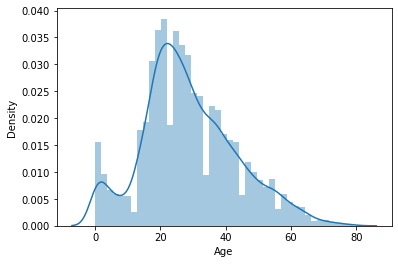

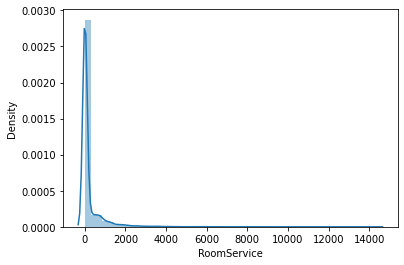

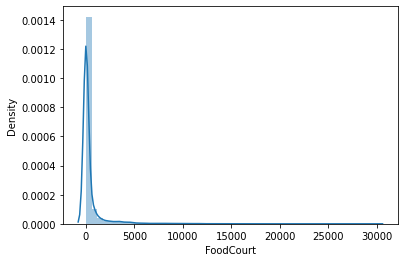

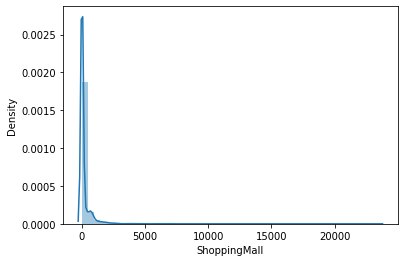

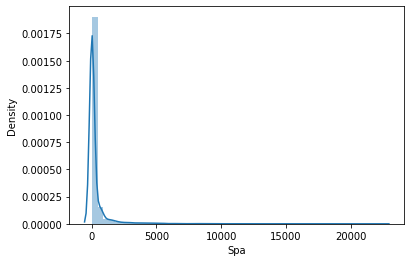

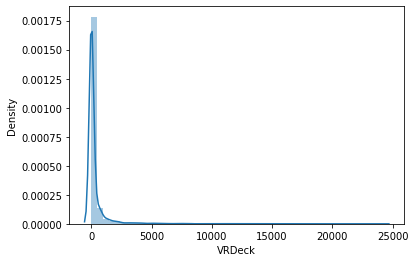

In [ ]:
for col in df.select_dtypes('float64'):
    plt.figure()
    sns.distplot(df[col])
    

On peut dire quoi sur ces variables ? Est ce qu'elles sont centrées ?

In [ ]:
df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

<h2>Les variables qualitatives</h2>

In [ ]:
#Les catégories 
for col in df.select_dtypes('object'):
    print(f'{col:-<50} {df[col].unique()}')

HomePlanet---------------------------------------- ['Europa' 'Earth' 'Mars' nan]
CryoSleep----------------------------------------- [False True nan]
Cabin--------------------------------------------- ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination--------------------------------------- ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP----------------------------------------------- [False True nan]


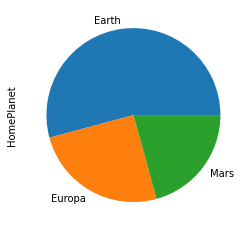

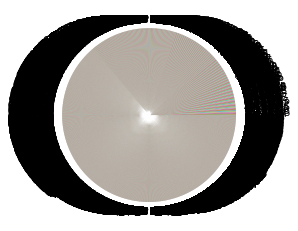

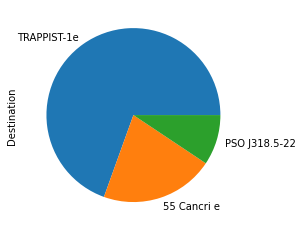

In [ ]:
#Nombres de catégories dans chaque variable
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

On peut remarquer que notre dataset est composée de 3 HomePlanet : Europa , Earth , Mars </p>
et de 3 Destinations : TRAPPIST-1e ,PSO J318.5-22 et 55 Cancri e

<h2>Relation Traget/variables</h2>

In [41]:
#Création de sous ensembles transported et not transported
transported_df=df[df['Transported']==True]
not_transported_df=df[df['Transported']==False]

In [4]:
#Creation de l'ensemble luxury amenities
luxury_amenities=df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]

NameError: name 'df' is not defined

In [ ]:
luxury_amenities

RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0             0.0        0.0           0.0     0.0     0.0
1           109.0        9.0          25.0   549.0    44.0
2            43.0     3576.0           0.0  6715.0    49.0
3             0.0     1283.0         371.0  3329.0   193.0
4           303.0       70.0         151.0   565.0     2.0
...           ...        ...           ...     ...     ...
8688          0.0     6819.0           0.0  1643.0    74.0
8689          0.0        0.0           0.0     0.0     0.0
8690          0.0        0.0        1872.0     1.0     0.0
8691          0.0     1049.0           0.0   353.0  3235.0
8692        126.0     4688.0           0.0     0.0    12.0

[8693 rows x 5 columns]

<h3>Target/luxury amenities</h3>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


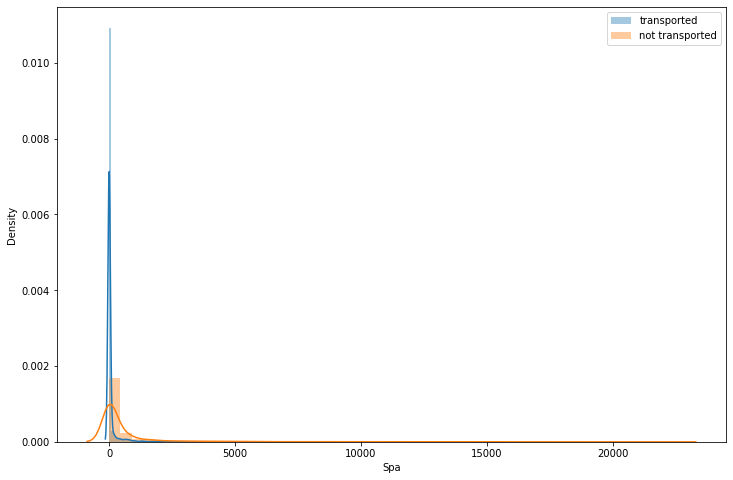

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [ ]:
for col in luxury_amenities:
    plt.figure(figsize=(12,8))
    sns.distplot(transported_df[col],label='transported')
    sns.distplot(not_transported_df[col],label='not transported')
    plt.legend()
    plt.show()

Il semblerait que VRDeck , Spa , Shopping Mall , FoodCourt et Room Service sont liées à la target . Hypothèse à tester par la suite .

<h3>Target/Age</h3>

<AxesSubplot:xlabel='Age', ylabel='count'>

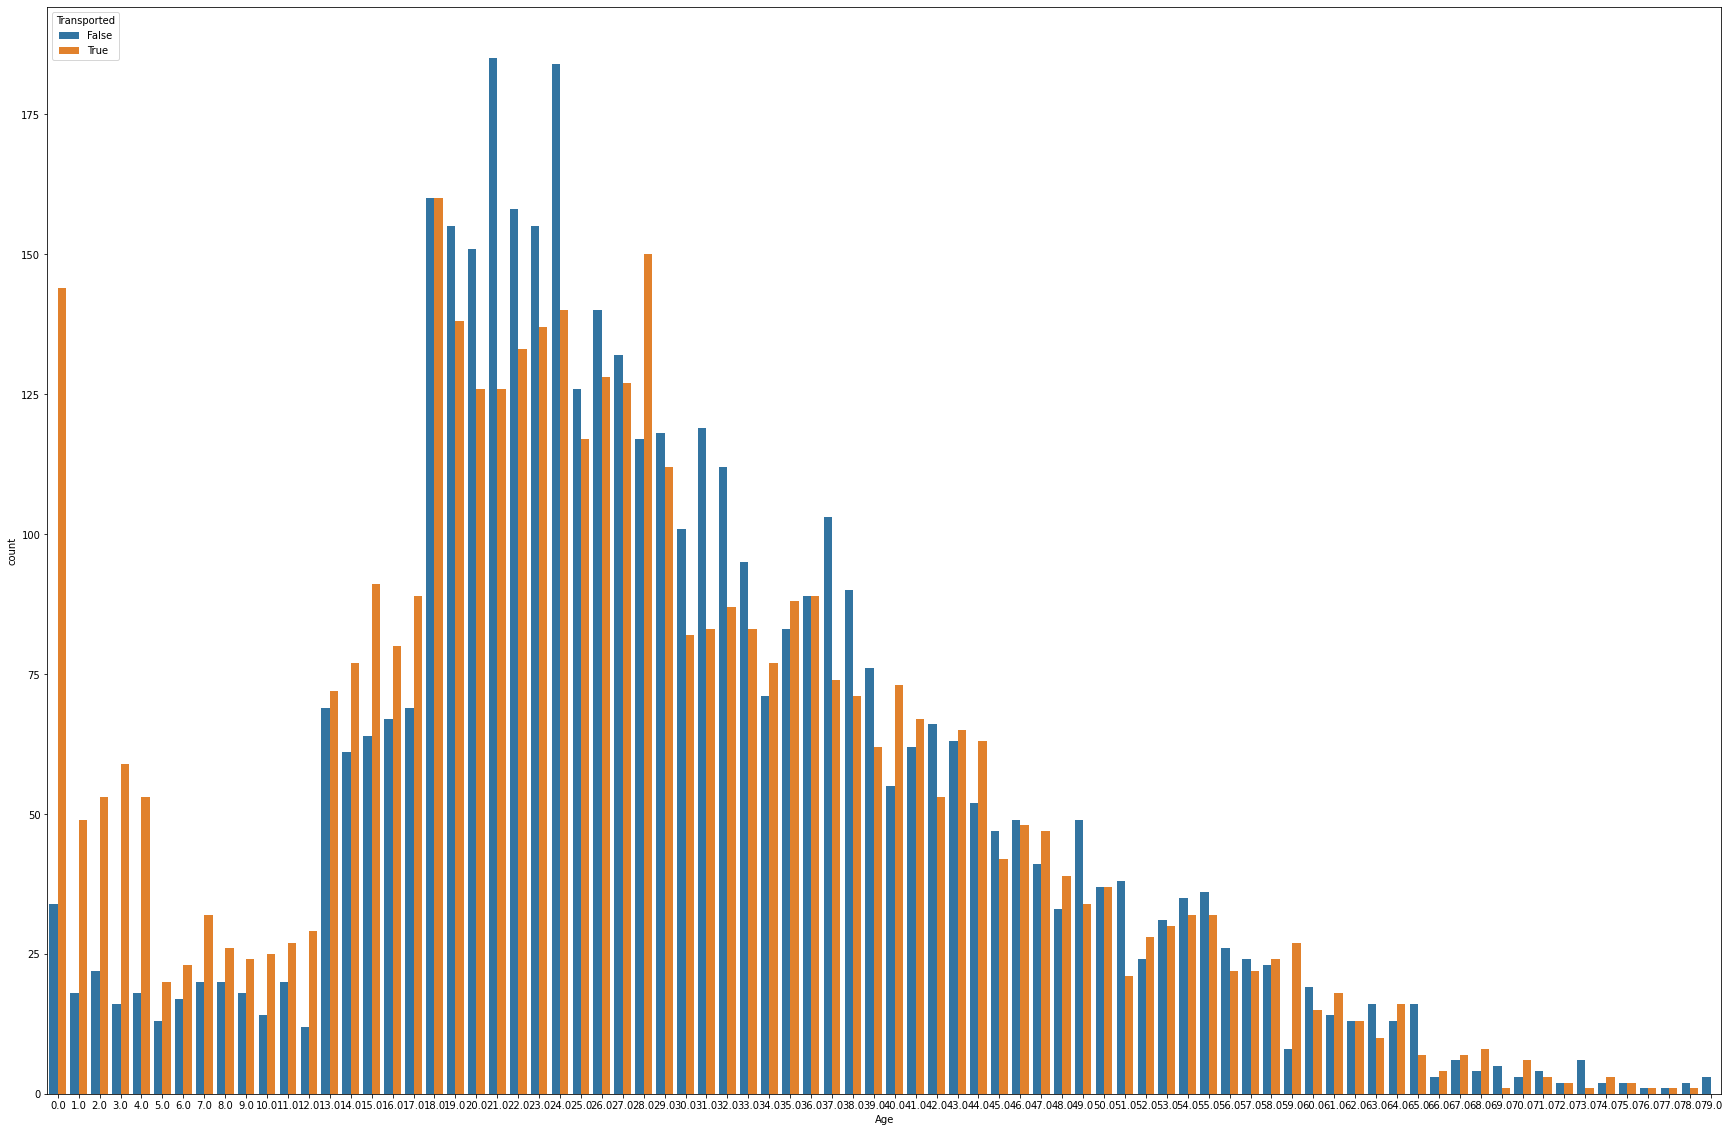

In [ ]:
plt.figure(figsize=(30,20))
sns.countplot(x='Age', hue='Transported',data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

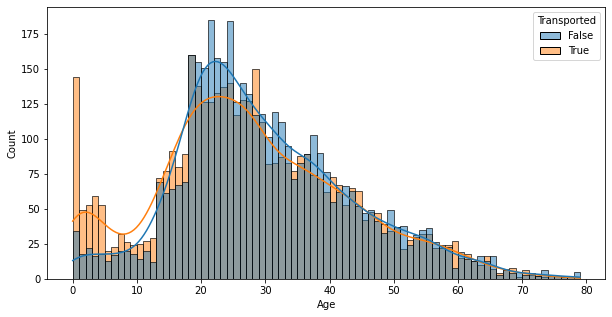

In [12]:


plt.figure(figsize = (10, 5))
sns.histplot(
    data = df,
    x = "Age",
    hue = "Transported",
    kde = True,
    binwidth = 1
)



In [13]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, retbins=True)

([(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
 Categories (3, interval[float64]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]],
 array([0.994, 3.   , 5.   , 7.   ]))

On remarque qu'il n'y a pas une tranche d'age où les personnes sont soit toujours transportées ou pas transportées

<h3>Target/Boolean variables</h3>

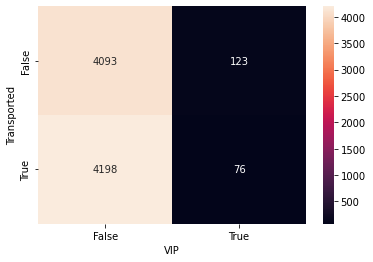

In [ ]:
#Relation de la target avec CryoSleep et VIP
for col in df[['CryoSleep','VIP']]:
    plt.figure()
    sns.heatmap(pd.crosstab(df['Transported'],df[col]),annot=True,fmt='d')

On remarque que si CryoSleep est False , la personne a moins de  chance pour etre transportée , par contre , si CryoSleep est vrai , la personne a a peu pres 4 fois plus de chance d'etre transportée</p>
On peut dire que VIP n'a pas trop d'influence sur la target.

<h3>Target/Categorical Variables</h3>

In [ ]:
#Relation de la target avec HomePlanet
pd.crosstab(df['Transported'],df['HomePlanet'])

HomePlanet   Earth  Europa  Mars
Transported                     
False         2651     727   839
True          1951    1404   920

<p>Chance d'etre transporté :</p>
  <p>Earth : 42% </p>
  <p>Europa: 66% </p>
  <p>Mars: 52 % <p>

In [ ]:
#Relation de la target avec la Destination
pd.crosstab(df['Transported'],df['Destination'])

Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
Transported                                         
False                702            395         3128
True                1098            401         2787

<p>Chance d'etre transporté :</p>
  <p>55 Cancri e  : 61% </p>
  <p>PSO J318.5-22: 50% </p>
  <p>TRAPPIST-1e:47% <p>
    
Il faut penser à visualiser la relation la planète de départ,la planète d'arrivée et la target .

In [ ]:
pd.crosstab(df['Transported'],df['Cabin'])

Cabin        A/0/P  A/0/S  A/1/S  A/10/P  A/10/S  A/100/S  A/101/S  A/102/S  \
Transported                                                                   
False            1      2      0       1       0        0        2        1   
True             1      0      3       0       1        2        0        0   

Cabin        A/103/S  A/104/S  ...  G/996/S  G/998/P  G/998/S  G/999/P  \
Transported                    ...                                       
False              2        2  ...        0        1        0        1   
True               1        1  ...        1        0        1        1   

Cabin        G/999/S  T/0/P  T/1/P  T/2/P  T/2/S  T/3/P  
Transported                                              
False              0      1      1      1      1      0  
True               2      0      0      0      0      1  

[2 rows x 6560 columns]

<h2>Relation variables/variables</h2>

<h3>luxury amenities/luxury amenities</h3>

In [ ]:
fig, axes = plt.subplots(2, 3, sharey=True, figsize=(15, 7))
df.plot.scatter(x='RoomService', y='Age', ax=axes[0, 0])
df.plot.scatter(x='FoodCourt', y='Age', ax=axes[0, 1])
df.plot.scatter(x='ShoppingMall', y='Age', ax=axes[0, 2])
df.plot.scatter(x='Spa', y='Age', ax=axes[1, 0])
df.plot.scatter(x='VRDeck', y='Age', ax=axes[1, 1])
plt.show()

<AxesSubplot:>

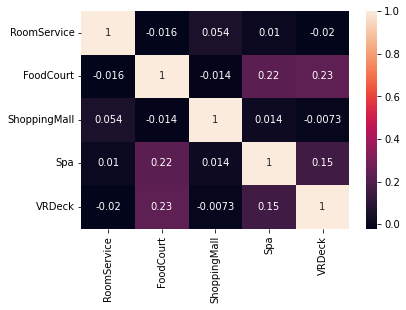

In [ ]:
sns.heatmap(luxury_amenities.corr(),annot=True)

Il existe de faibles coorélations entre les variables de luxury_amenities

<h3>HomePlanet/Destination</h3>

In [ ]:
df.groupby(["HomePlanet","Destination"]).size().unstack().fillna(0)

Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
HomePlanet                                          
Earth                690            712         3101
Europa               886             19         1189
Mars                 193             49         1475

A peu près 70% des passagers provenant de Earth sont transportés à TRAPPIST-1e .</p>
<p>La majorité des passagers provenant de Europa sont transportés à soit 55 Cancri e ou à TRAPPIST-1e</p>
<p>86% passagers provenant de Mars sont transportés à TRAPPIST-1e</p>

 <h3>luxury amenities/Age</h3>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

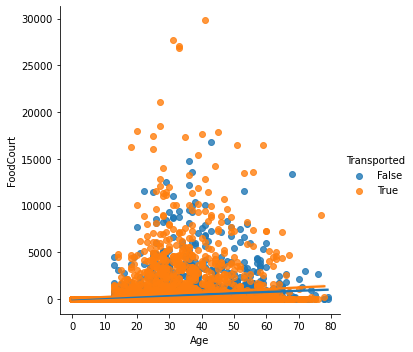

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

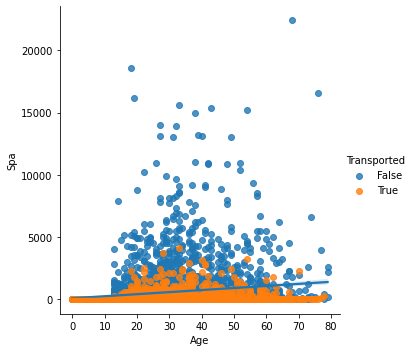

<Figure size 432x288 with 0 Axes>

In [ ]:
for col in luxury_amenities :
    plt.figure()
    sns.lmplot(x='Age',y=col,hue='Transported',data=df)

In [ ]:
df.corr()['Age'].sort_values

<bound method Series.sort_values of Age             1.000000
RoomService     0.068723
FoodCourt       0.130421
ShoppingMall    0.033133
Spa             0.123970
VRDeck          0.101007
Transported    -0.075026
Name: Age, dtype: float64>

La coorelation de l'age avec les autres  variable est faible , l'age n influe pas donc sur les autres variables (pas de relation lineaire )

<h2>Test d'hypothèses</h2>

Hypothèses nulle(H0):</p>
H0=Les personnes transportées et non transportées ont dépensé le meme montant sur les 
équipements de luxe du Spaceship Titanic .

In [ ]:
#Test de student
from scipy.stats import ttest_ind

In [ ]:
transported_df.shape

(4378, 12)

In [ ]:
not_transported_df.shape

(4315, 12)

In [ ]:
#echantillon de transported_df 
transported_df.sample(not_transported_df.shape[0])

HomePlanet CryoSleep     Cabin    Destination   Age    VIP  RoomService  \
4857      Earth     False   G/836/P    TRAPPIST-1e  25.0  False        322.0   
8527     Europa      True   C/302/P    55 Cancri e  25.0  False          0.0   
4046       Mars      True   F/810/S    TRAPPIST-1e  24.0  False          0.0   
1439       Mars      True   F/295/S    TRAPPIST-1e  28.0  False          0.0   
8206      Earth     False  F/1808/P    TRAPPIST-1e  17.0  False          0.0   
...         ...       ...       ...            ...   ...    ...          ...   
4560      Earth     False   F/918/S  PSO J318.5-22  44.0    NaN          0.0   
5290     Europa      True   C/178/P    TRAPPIST-1e  35.0  False          0.0   
1713      Earth     False   G/299/P    TRAPPIST-1e  31.0  False          2.0   
2783     Europa      True   C/114/S    TRAPPIST-1e  45.0  False          0.0   
4389     Europa      True   C/148/P            NaN  53.0  False          0.0   

      FoodCourt  ShoppingMall    Spa  VRDeck  Transported  
4857        0.0          81.0    3.0   298.0         True  
8527        0.0           0.0    0.0     0.0         True  
4046        0.0           0.0    0.0     0.0         True  
1439        0.0           0.0    0.0     0.0         True  
8206      810.0          66.0    0.0     0.0         True  
...         ...           ...    ...     ...          ...  
4560      463.0           1.0  172.0     0.0         True  
5290        NaN           0.0    0.0     NaN         True  
1713      811.0           0.0    0.0     0.0         True  
2783        0.0           0.0    0.0     0.0         True  
4389        0.0           0.0    0.0     0.0         True  

[4315 rows x 12 columns]

On déduit que les personnes transportées dépensent des sommes significativement différentes sur La Room Service , Food Court , Spa ainsi que VRDeck , contrairement aux personnes non transportées.

<h1>Data Preprocessing</h1>

In [2]:

df=pd.read_csv(r'./train.csv')
test=pd.read_csv(r'./test.csv')
df=pd.DataFrame(data=df)
test=pd.DataFrame(data=test)
index_max=df.shape[0]
trans=df['Transported']
trans=trans.astype(int)
trans=trans.astype('category')
df=df.drop('Transported', axis = 1)
df1=pd.concat([df, test], ignore_index = True)

#Ajouter une colonne pour le nom
df1['Lastname'] = df1.Name.str.split(' ').str[1]
#Séparer Cabin
cols=["Cabindeck","num","Cabinside"]
df1[cols]=df1["Cabin"].str.split(pat="/",expand=True)
df1.drop(["num"],axis=1,inplace=True)
df1.drop(["Cabin"],axis=1,inplace=True)
trans

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: category
Categories (2, int64): [0, 1]

<h2>Outliers<h2>


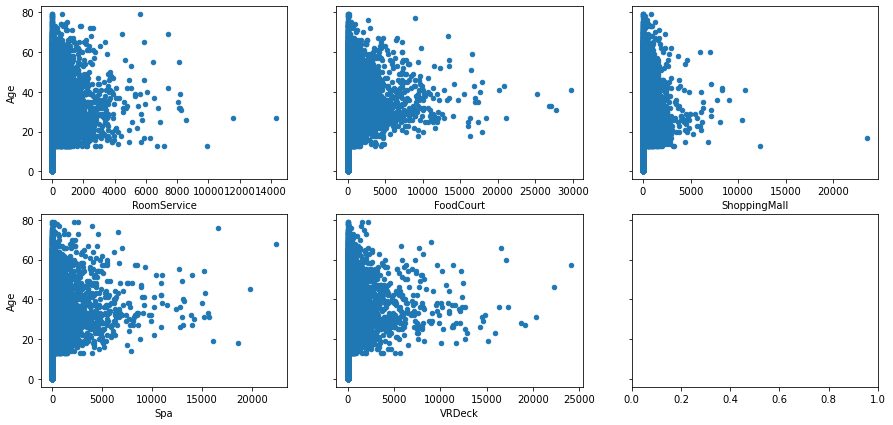

In [196]:
fig, axes = plt.subplots(2, 3, sharey=True, figsize=(15, 7))
df1.plot.scatter(x='RoomService', y='Age', ax=axes[0, 0])
df1.plot.scatter(x='FoodCourt', y='Age', ax=axes[0, 1])
df1.plot.scatter(x='ShoppingMall', y='Age', ax=axes[0, 2])
df1.plot.scatter(x='Spa', y='Age', ax=axes[1, 0])
df1.plot.scatter(x='VRDeck', y='Age', ax=axes[1, 1])
plt.show()

<p>On remplace les outliers par les valeurs limites pour chaque variable.<p>

In [3]:
# Cap RoomService at 9000
df1.loc[df1.RoomService.gt(9000), 'RoomService'] = 9000

# Cap FoodCourt at 22000
df1.loc[df1.FoodCourt.gt(22000), 'FoodCourt'] = 22000

# Cap ShoppingMall at 11000
df1.loc[df1.ShoppingMall.gt(11000), 'ShoppingMall'] = 11000

# Cap Spa at 17000
df1.loc[df1.Spa.gt(17000), 'Spa'] = 17000

# Cap VRDeck at 21000
df1.loc[df1.VRDeck.gt(21000), 'VRDeck'] = 21000

<h2>Gestion des valeurs manquantes</h2>

**Cryosleep**

In [94]:
# on s'assure que les passagers en Cryosleep ont des dépenses nulles
df1.loc[df1.CryoSleep.eq(True), ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum()

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

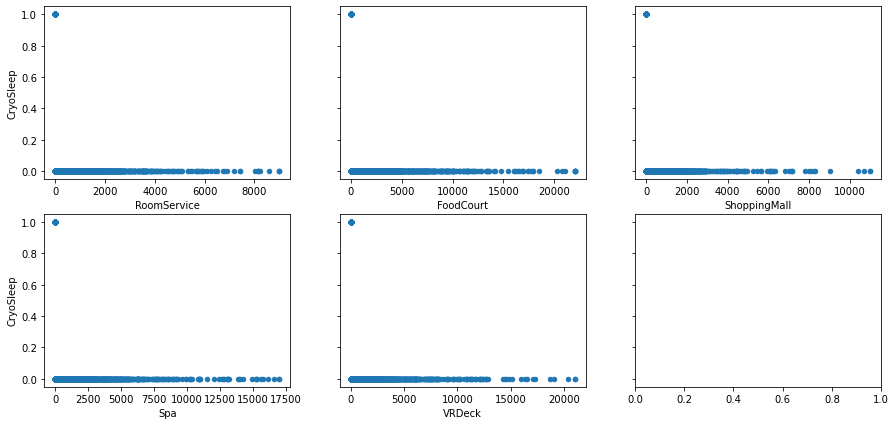

In [6]:
fig, axes = plt.subplots(2, 3, sharey=True, figsize=(15, 7))
df1.plot.scatter(x='RoomService', y='CryoSleep', ax=axes[0, 0])
df1.plot.scatter(x='FoodCourt', y='CryoSleep', ax=axes[0, 1])
df1.plot.scatter(x='ShoppingMall', y='CryoSleep', ax=axes[0, 2])
df1.plot.scatter(x='Spa', y='CryoSleep', ax=axes[1, 0])
df1.plot.scatter(x='VRDeck', y='CryoSleep', ax=axes[1, 1])
plt.show()

In [4]:
# On remplace les valeurs manquantes de toutes les dépenses des passagers en Cryosleep par zero
df1.loc[df1.CryoSleep.eq(True), ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = 0

#Pour les autres on remplace par le mode
for i in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']: 
    df1.loc[df1[i].isna(), i] = mode(df1.loc[df1[i].gt(0), i])

Création d'une nouvelle colonne qui regroupe toutes les dépenses

In [5]:
luxury_amenities=df1[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
df1['money']=luxury_amenities.sum(axis=1)
df1

PassengerId HomePlanet CryoSleep    Destination   Age    VIP  \
0         0001_01     Europa     False    TRAPPIST-1e  39.0  False   
1         0002_01      Earth     False    TRAPPIST-1e  24.0  False   
2         0003_01     Europa     False    TRAPPIST-1e  58.0   True   
3         0003_02     Europa     False    TRAPPIST-1e  33.0  False   
4         0004_01      Earth     False    TRAPPIST-1e  16.0  False   
...           ...        ...       ...            ...   ...    ...   
12965     9266_02      Earth      True    TRAPPIST-1e  34.0  False   
12966     9269_01      Earth     False    TRAPPIST-1e  42.0  False   
12967     9271_01       Mars      True    55 Cancri e   NaN  False   
12968     9273_01     Europa     False            NaN   NaN  False   
12969     9277_01      Earth      True  PSO J318.5-22  43.0  False   

       RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0              0.0        0.0           0.0     0.0     0.0   
1            109.0        9.0          25.0   549.0    44.0   
2             43.0     3576.0           0.0  6715.0    49.0   
3              0.0     1283.0         371.0  3329.0   193.0   
4            303.0       70.0         151.0   565.0     2.0   
...            ...        ...           ...     ...     ...   
12965          0.0        0.0           0.0     0.0     0.0   
12966          0.0      847.0          17.0    10.0   144.0   
12967          0.0        0.0           0.0     0.0     0.0   
12968          0.0     2680.0           0.0     0.0   523.0   
12969          0.0        0.0           0.0     0.0     0.0   

                    Name     Lastname Cabindeck Cabinside    money  
0        Maham Ofracculy    Ofracculy         B         P      0.0  
1           Juanna Vines        Vines         F         S    736.0  
2          Altark Susent       Susent         A         S  10383.0  
3           Solam Susent       Susent         A         S   5176.0  
4      Willy Santantines  Santantines         F         S   1091.0  
...                  ...          ...       ...       ...      ...  
12965        Jeron Peter        Peter         G         S      0.0  
12966      Matty Scheron      Scheron       NaN       NaN   1018.0  
12967        Jayrin Pore         Pore         D         P      0.0  
12968     Kitakan Conale       Conale         D         P   3203.0  
12969   Lilace Leonzaley    Leonzaley         G         S      0.0  

[12970 rows x 16 columns]

**Cryosleep**

In [200]:
df1["CryoSleep"].value_counts(normalize=True)

False    0.638152
True     0.361848
Name: CryoSleep, dtype: float64

In [6]:
# On remplace les valeurs manquantes de Cryosleep par False pour tous ceux dont les dépenses sont supérieures à 0
df1.loc[df1.CryoSleep.isna() & df1['money']>0, 'CryoSleep'] = False

df1.loc[df1.CryoSleep.isna(), 'CryoSleep'] = np.random.choice([False,True],1, p=[0.65, 0.35])[0]

**VIP**

In [ ]:
plt.figure(figsize = (10, 5))
sns.histplot(
    data = df,
    x = "Age",
    hue = "VIP",
    kde = True,
    binwidth = 1
)


In [19]:
df1["VIP"].value_counts(normalize=True)

False    0.97846
True     0.02154
Name: VIP, dtype: float64

In [203]:
df1.groupby('VIP').Age.min()

VIP
False     0.0
True     18.0
Name: Age, dtype: float64

In [114]:
df1.groupby(['HomePlanet', 'Destination']).VIP.value_counts()

HomePlanet  Destination    VIP  
Earth       55 Cancri e    False     668
            PSO J318.5-22  False     693
            TRAPPIST-1e    False    3030
Europa      55 Cancri e    False     807
                           True       63
            PSO J318.5-22  True       10
                           False       9
            TRAPPIST-1e    False    1107
                           True       56
Mars        55 Cancri e    False     189
            PSO J318.5-22  False      39
                           True        8
            TRAPPIST-1e    False    1383
                           True       55
Name: VIP, dtype: int64

In [87]:
df1.groupby(['VIP']).Cabindeck.value_counts()

VIP    Cabindeck
False  F            2748
       G            2558
       E             853
       B             729
       C             694
       D             439
       A             219
       T               5
True   B              42
       C              41
       A              35
       D              31
       F              29
       E              15
Name: Cabindeck, dtype: int64

Aucun mineur n'a le statut de VIP
Aucun passager provenant de la terre n'a pas le statut VIP
Aucun passager à destination de 55 Cancri n'ont pas le statut VIP
Aucun passager assis au Deck G et T n'a lestatut VIP

In [7]:
#On remplace VIP par False pour tous les mineurs
df1.loc[(df1.VIP.isna() & (df1.Age < 18)), 'VIP'] = False

# On remplace VIP par False pour tous les passagers provenant de la terre
df1.loc[(df1.VIP.isna() & (df1.HomePlanet == 'Earth')), 'VIP'] = False

# On remplace VIP par False pour tous les passagers à destination de Cancri
df1.loc[(df1.VIP.isna()  & (df1.Destination.eq('55 Cancri e'))), 'VIP'] = False

# On remplace VIP par False pour tous les passagers ds les decks G et T
df1.loc[(df1.VIP.isna() & (df1.Cabindeck.isin(['G', 'T']))), 'VIP'] = False

#Pour le reste 
df1.loc[df1["VIP"].isna(),"VIP"]=np.random.choice([False,True],1, p=[0.9, 0.1])[0]

**Home planet**

In [102]:
df1.groupby(['HomePlanet']).Cabindeck.value_counts()

HomePlanet  Cabindeck
Earth       G            2498
            F            1614
            E             395
Europa      B             766
            C             734
            A             252
            D             188
            E             128
            T               4
Mars        F            1110
            E             330
            D             282
Name: Cabindeck, dtype: int64

Tous les passagers assis en G proviennent de Earth
Tous les passagers assis en B,C,A et T proviennent d'Europa

In [8]:
#
df1.loc[(df1.HomePlanet.isna() & df1.VIP.eq(True) & df1.Destination.eq('55 Cancri e')), 'HomePlanet'] = 'Europa'
df1.loc[(df1.HomePlanet.isna() & df1.Cabindeck.isin(['A','B','C','T'])), 'HomePlanet'] = 'Europa'
df1.loc[df1.HomePlanet.isna() & df1.Cabindeck.eq('G'), 'HomePlanet'] = 'Earth'

# Create a Lastname-HomePlanet dictionary
present_values = ~df1.Lastname.isna() & ~df1.HomePlanet.isna()
lastname_home_map = (df1.loc[present_values, ['Lastname', 'HomePlanet']]
            .set_index('Lastname').to_dict()['HomePlanet'])

# Impute HomePlanet from dictionary
df1.loc[df1.HomePlanet.isna(), 'HomePlanet'] = df1.Lastname.map(lastname_home_map)

df1.loc[df1.HomePlanet.isna(), 'HomePlanet']=mode(df1['HomePlanet'])

**Age**

In [141]:
df1.groupby('HomePlanet')['Age'].median()

HomePlanet
Earth     23.0
Europa    33.0
Mars      28.0
Name: Age, dtype: float64

In [9]:
# remplacer les valeurs manquantes par la médiane de chaque planète
median_age_by_planet = df1.groupby('HomePlanet')['Age'].median()
df1.loc[df1.Age.isna() & df1.HomePlanet.eq("Earth"),'Age']=median_age_by_planet["Earth"]
df1.loc[df1.Age.isna() & df1.HomePlanet.eq("Europa"),'Age']=median_age_by_planet["Europa"]
df1.loc[df1.Age.isna() & df1.HomePlanet.eq("Mars"),'Age']=median_age_by_planet["Mars"]


In [10]:
# Create Age_group feature
df1['Age_group'] = pd.cut(x=df1.Age, labels=[1, 3, 2],
                         bins=[-1, 17, 43, df1.Age.max()]).astype('float')

In [11]:
df1.head()

PassengerId HomePlanet CryoSleep  Destination   Age    VIP  RoomService  \
0     0001_01     Europa     False  TRAPPIST-1e  39.0  False          0.0   
1     0002_01      Earth     False  TRAPPIST-1e  24.0  False        109.0   
2     0003_01     Europa     False  TRAPPIST-1e  58.0   True         43.0   
3     0003_02     Europa     False  TRAPPIST-1e  33.0  False          0.0   
4     0004_01      Earth     False  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck               Name     Lastname  \
0        0.0           0.0     0.0     0.0    Maham Ofracculy    Ofracculy   
1        9.0          25.0   549.0    44.0       Juanna Vines        Vines   
2     3576.0           0.0  6715.0    49.0      Altark Susent       Susent   
3     1283.0         371.0  3329.0   193.0       Solam Susent       Susent   
4       70.0         151.0   565.0     2.0  Willy Santantines  Santantines   

  Cabindeck Cabinside    money  Age_group  
0         B         P      0.0        3.0  
1         F         S    736.0        3.0  
2         A         S  10383.0        2.0  
3         A         S   5176.0        3.0  
4         F         S   1091.0        1.0

**Destination**

In [11]:
df1.loc[df1.Destination.isna(),'Destination']=mode(df1['Destination'])

In [28]:
df1.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            294
Lastname        294
Cabindeck       299
Cabinside       299
money             0
Age_group         0
dtype: int64

<h4>CabinDeck</h4>

In [ ]:
df1.groupby(["Cabindeck","VIP"]).size().unstack().fillna(0)

VIP         False  True
Cabindeck              
A           221.0  35.0
B           737.0  42.0
C           706.0  41.0
D           447.0  31.0
E           861.0  15.0
F          2765.0  29.0
G          2559.0   0.0
T             5.0   0.0

In [12]:
df1.loc[(df1["Cabindeck"].isna()) & (df1["VIP"]==0),"Cabindeck"]="G"
df1.loc[(df1["Cabindeck"].isna()) & (df1["VIP"]==1),"Cabindeck"]="A"

On remarque que toutes les personnes qui ne sont pas VIP sont en Cabindeck G , et en cabine A on retrouve le moins de personnes qui sont VIP</p>
On remplit donc les valeurs manquantes de cabinDeck tenant en compte si la personne est VIP ou pas .

<h4>CabinSide</h4>

In [15]:
df1["Cabinside"].value_counts(normalize=True)

S    0.504827
P    0.495173
Name: Cabinside, dtype: float64

In [13]:
df1.loc[df1["Cabinside"].isna(),"Cabinside"]=np.random.choice(["P","S"],1, p=[0.51, 0.49])[0]

In [14]:
df1.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            294
Lastname        294
Cabindeck         0
Cabinside         0
money             0
Age_group         0
dtype: int64

In [ ]:
df1["Cabinside"].value_counts(normalize=True)

S    0.516162
P    0.483838
Name: Cabinside, dtype: float64

In [15]:
df1=df1.drop('Name', axis = 1)
df1=df1.drop('Lastname', axis = 1)
df1=df1.drop('PassengerId', axis = 1)

<h3>Convertir False/True en 0/1</h3>

In [16]:
df1["CryoSleep"]=df1["CryoSleep"].astype(int)

df1["VIP"]=df1["VIP"].astype(int)
df1.head()

HomePlanet  CryoSleep  Destination   Age  VIP  RoomService  FoodCourt  \
0     Europa          0  TRAPPIST-1e  39.0    0          0.0        0.0   
1      Earth          0  TRAPPIST-1e  24.0    0        109.0        9.0   
2     Europa          0  TRAPPIST-1e  58.0    1         43.0     3576.0   
3     Europa          0  TRAPPIST-1e  33.0    0          0.0     1283.0   
4      Earth          0  TRAPPIST-1e  16.0    0        303.0       70.0   

   ShoppingMall     Spa  VRDeck Cabindeck Cabinside    money  Age_group  
0           0.0     0.0     0.0         B         P      0.0        3.0  
1          25.0   549.0    44.0         F         S    736.0        3.0  
2           0.0  6715.0    49.0         A         S  10383.0        2.0  
3         371.0  3329.0   193.0         A         S   5176.0        3.0  
4         151.0   565.0     2.0         F         S   1091.0        1.0

<h3>Convertir les variables catégorielles en variables indicatrices</h3>

In [17]:
df1=pd.get_dummies(df1, columns=['HomePlanet','Destination'])
df1

CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0              0  39.0    0          0.0        0.0           0.0     0.0   
1              0  24.0    0        109.0        9.0          25.0   549.0   
2              0  58.0    1         43.0     3576.0           0.0  6715.0   
3              0  33.0    0          0.0     1283.0         371.0  3329.0   
4              0  16.0    0        303.0       70.0         151.0   565.0   
...          ...   ...  ...          ...        ...           ...     ...   
12965          1  34.0    0          0.0        0.0           0.0     0.0   
12966          0  42.0    0          0.0      847.0          17.0    10.0   
12967          1  28.0    0          0.0        0.0           0.0     0.0   
12968          0  33.0    0          0.0     2680.0           0.0     0.0   
12969          1  43.0    0          0.0        0.0           0.0     0.0   

       VRDeck Cabindeck Cabinside    money  Age_group  HomePlanet_Earth  \
0         0.0         B         P      0.0        3.0                 0   
1        44.0         F         S    736.0        3.0                 1   
2        49.0         A         S  10383.0        2.0                 0   
3       193.0         A         S   5176.0        3.0                 0   
4         2.0         F         S   1091.0        1.0                 1   
...       ...       ...       ...      ...        ...               ...   
12965     0.0         G         S      0.0        3.0                 1   
12966   144.0         G         S   1018.0        3.0                 1   
12967     0.0         D         P      0.0        3.0                 0   
12968   523.0         D         P   3203.0        3.0                 0   
12969     0.0         G         S      0.0        3.0                 1   

       HomePlanet_Europa  HomePlanet_Mars  Destination_55 Cancri e  \
0                      1                0                        0   
1                      0                0                        0   
2                      1                0                        0   
3                      1                0                        0   
4                      0                0                        0   
...                  ...              ...                      ...   
12965                  0                0                        0   
12966                  0                0                        0   
12967                  0                1                        1   
12968                  1                0                        0   
12969                  0                0                        0   

       Destination_PSO J318.5-22  Destination_TRAPPIST-1e  
0                              0                        1  
1                              0                        1  
2                              0                        1  
3                              0                        1  
4                              0                        1  
...                          ...                      ...  
12965                          0                        1  
12966                          0                        1  
12967                          0                        0  
12968                          0                        1  
12969                          1                        0  

[12970 rows x 18 columns]

In [18]:
df1=pd.get_dummies(df1, columns=['Cabindeck','Cabinside'])

In [19]:
categ=df1.select_dtypes(include=['int32','uint8']).columns

df1[categ]=df1[categ].astype('category')

In [20]:
df1.dtypes

CryoSleep                    category
Age                           float64
VIP                          category
RoomService                   float64
FoodCourt                     float64
ShoppingMall                  float64
Spa                           float64
VRDeck                        float64
money                         float64
Age_group                     float64
HomePlanet_Earth             category
HomePlanet_Europa            category
HomePlanet_Mars              category
Destination_55 Cancri e      category
Destination_PSO J318.5-22    category
Destination_TRAPPIST-1e      category
Cabindeck_A                  category
Cabindeck_B                  category
Cabindeck_C                  category
Cabindeck_D                  category
Cabindeck_E                  category
Cabindeck_F                  category
Cabindeck_G                  category
Cabindeck_T                  category
Cabinside_P                  category
Cabinside_S                  category
dtype: objec

<h2>TrainTest</h2>

In [21]:
from sklearn.model_selection import train_test_split
y=trans
X=df1.iloc[0:index_max,:]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [22]:
y_test.value_counts(normalize=True)

1    0.503738
0    0.496262
Name: Transported, dtype: float64

In [23]:
y_train.value_counts(normalize=True)

1    0.503595
0    0.496405
Name: Transported, dtype: float64

Les classes sont équilibrées dans notre train et test set

In [24]:
X_train

CryoSleep   Age VIP  RoomService  FoodCourt  ShoppingMall    Spa  VRDeck  \
3600         0   0.0   0          0.0        0.0           0.0    0.0     0.0   
1262         1  17.0   0          0.0        0.0           0.0    0.0     0.0   
8612         1  35.0   0          0.0        0.0           0.0    0.0     0.0   
5075         1  26.0   0          0.0        0.0           0.0    0.0     0.0   
4758         0  13.0   0          0.0        0.0          60.0    1.0  5147.0   
...        ...   ...  ..          ...        ...           ...    ...     ...   
4087         0  43.0   0          0.0     1947.0           0.0    0.0  1651.0   
4406         0  38.0   0        183.0      203.0           0.0  110.0   374.0   
7111         0  45.0   0          1.0        7.0          56.0  613.0     0.0   
426          1  24.0   0          0.0        0.0           0.0    0.0     0.0   
7925         0  21.0   0         32.0      640.0           0.0    0.0     0.0   

       money  Age_group  ... Cabindeck_A Cabindeck_B Cabindeck_C Cabindeck_D  \
3600     0.0        1.0  ...           0           0           0           0   
1262     0.0        1.0  ...           0           0           0           0   
8612     0.0        3.0  ...           0           0           0           0   
5075     0.0        3.0  ...           0           0           0           1   
4758  5208.0        1.0  ...           0           0           0           0   
...      ...        ...  ...         ...         ...         ...         ...   
4087  3598.0        3.0  ...           0           1           0           0   
4406   870.0        3.0  ...           0           0           0           0   
7111   677.0        2.0  ...           0           0           0           0   
426      0.0        3.0  ...           0           0           0           0   
7925   672.0        3.0  ...           0           0           0           0   

     Cabindeck_E Cabindeck_F Cabindeck_G Cabindeck_T Cabinside_P Cabinside_S  
3600           0           0           1           0           0           1  
1262           0           0           1           0           0           1  
8612           0           0           1           0           0           1  
5075           0           0           0           0           0           1  
4758           0           0           1           0           1           0  
...          ...         ...         ...         ...         ...         ...  
4087           0           0           0           0           0           1  
4406           0           1           0           0           1           0  
7111           0           0           1           0           0           1  
426            0           0           1           0           0           1  
7925           0           1           0           0           0           1  

[6954 rows x 26 columns]

**Data Normalization**

In [25]:
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
numeric_columns=X.select_dtypes(include='number').columns

transformers = [('normalizing',  PowerTransformer(method='yeo-johnson'), numeric_columns)]
columns_transformer = ColumnTransformer(transformers, remainder='passthrough')
X_train=columns_transformer.fit_transform(X_train)
X_test=columns_transformer.transform(X_test)
X1=columns_transformer.transform(X)

In [26]:
test1=df1.iloc[index_max:,]
test1=pd.DataFrame(test1).reset_index(drop=True)
test1=columns_transformer.transform(test1)


# Model Building


In [1]:
import sklearn.feature_selection
from sklearn.feature_selection import SequentialFeatureSelector

In [83]:
from catboost import CatBoostClassifier
from sklearn.feature_selection import SequentialFeatureSelector
# # Define model
cat_model = CatBoostClassifier(thread_count=-1, verbose=False)

# # Define and fit feature selector
sfs = SequentialFeatureSelector(cat_model, 
                                 scoring='accuracy', 
                                 direction = 'backward')
sfs.fit(X1,y)

# # List of the final features to be used for submission modeling
final_features = list(sfs.get_feature_names_out())



C:\Users\user\anaconda3\lib\site-packages\sklearn\feature_selection\_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


In [27]:
X11=np.array((X1[:,1],X1[:,3],X1[:,4],X1[:,5],X1[:,6],X1[:,7],X1[:,8],X1[:,14],X1[:,15],X1[:,18],X1[:,20],X1[:,22],X1[:,25]))
X11=np.transpose(X11)
X11.shape

(8693, 13)

In [28]:
test11=np.array((test1[:,1],test1[:,3],test1[:,4],test1[:,5],test1[:,6],test1[:,7],test1[:,8],test1[:,14],test1[:,15],test1[:,18],test1[:,20],test1[:,22],test1[:,25]))
test11=np.transpose(test11)
test11.shape

(4277, 13)

In [84]:
final_features

['x1',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x14',
 'x15',
 'x18',
 'x20',
 'x22',
 'x25']

## Gaussian Naive Bayes

In [72]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [80]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Model accuracy score on train data: 0.71
The accuracy on test data is:  0.7314548591144335


[Text(0.5, 1.0, 'confusion matrix')]

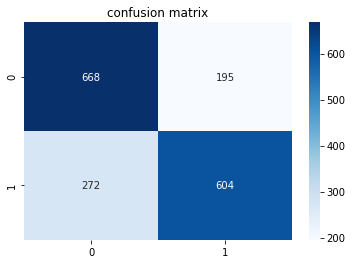

In [81]:
#cross validation
cv=StratifiedKFold(n_splits=5)
print(f"Model accuracy score on train data: {round(cross_val_score(nb,X_train,y_train,cv=cv,scoring='accuracy').mean(),2)}")
y_predicted=nb.predict(X_test)
print("The accuracy on test data is: ",accuracy_score(y_predicted,y_test))
sns.heatmap(data=confusion_matrix(y_test,y_predicted),annot=True,fmt="d",cmap='Blues').set(title="confusion matrix")

## Decision Trees

Model accuracy score on train data: 0.74
The accuracy on test data is:  0.7395054629097182


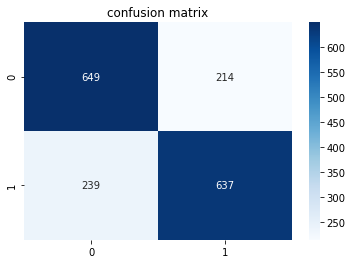

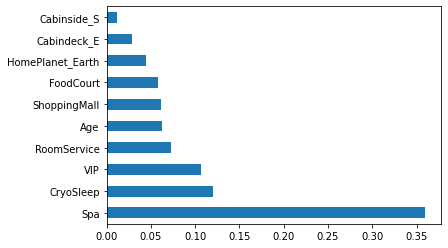

In [82]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_predicted=tree.predict(X_test)
print(f"Model accuracy score on train data: {round(cross_val_score(tree,X_train,y_train,cv=cv,scoring='accuracy').mean(),2)}")
print("The accuracy on test data is: ",accuracy_score(y_predicted,y_test))
sns.heatmap(data=confusion_matrix(y_test,y_predicted),annot=True,fmt="d",cmap='Blues').set(title="confusion matrix")
plt.show()
coefficients_importance=tree.feature_importances_
coefficients_importance=pd.Series(coefficients_importance,index=X.columns.values).sort_values(ascending=False)[:10]
coefficients_importance.plot(kind='barh')
plt.show()

**RandomForestClassifier**

Model accuracy score on train data: 0.79
The accuracy on test data is:  0.7918343875790684


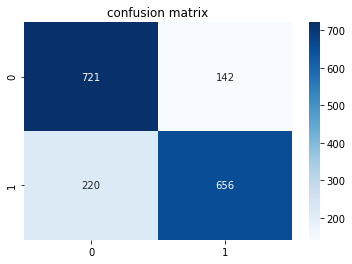

NameError: name 'tree' is not defined

In [79]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import cross_val_score
forest= RandomForestClassifier()
forest.fit(X_train,y_train)
y_predicted=forest.predict(X_test)
print(f"Model accuracy score on train data: {round(cross_val_score(forest,X_train,y_train,cv=cv,scoring='accuracy').mean(),2)}")
print("The accuracy on test data is: ",accuracy_score(y_predicted,y_test))
sns.heatmap(data=confusion_matrix(y_test,y_predicted),annot=True,fmt="d",cmap='Blues').set(title="confusion matrix")
plt.show()
coefficients_importance=tree.feature_importances_
coefficients_importance=pd.Series(coefficients_importance,index=X.columns.values).sort_values(ascending=False)[:10]
coefficients_importance.plot(kind='barh')
plt.show()

In [27]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [66]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 81.25%


In [67]:
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [55]:
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb
params = { 'max_depth': [2,3, 5, 6,7,10, 15],
           'learning_rate': [0.001, 0.005, 0.01, 0.02],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100,500,700, 1000]}
xgbr = xgb.XGBClassifier(seed = 20,objective='reg:logistic')
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=35,
                         verbose=1)
clf.fit(X1, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed: 16.9min finished


Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 700, 'max_depth': 7, 'learning_rate': 0.02, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.44195843893126346


In [56]:

y_pred_xgb_rand = clf.predict(test1)
#predictions = [round(value) for value in y_pred]
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

**Catboost**

In [29]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
# # Define model
cat_model = CatBoostClassifier()

# # Define parameters' grid
grid = {'verbose': [False],
         'thread_count': [-1],
        'depth': [4, 5, 6, 7],
         'iterations': [1000, 2000, 3000, 5000],
         'learning_rate': [0.001,0.003, 0.005, 0.01, 0.02]}

# # Define GridSearchCV
grid_cat = GridSearchCV(estimator=cat_model, param_grid=grid, cv=5, n_jobs=-1)
grid_cat.fit(X11, y)

params = grid_cat.best_params_

print('\n Best Score:\n', grid_cat.best_score_)
print('\n Best parameters:\n', params)




 Best Score:
 0.808469081671344

 Best parameters:
 {'depth': 6, 'iterations': 5000, 'learning_rate': 0.005, 'thread_count': -1, 'verbose': False}


In [70]:
params =  {'depth': 6,
           'iterations': 5000, 
           'learning_rate': 0.005, 
           'thread_count': -1, 
           'verbose': False}

In [30]:
from sklearn.model_selection import cross_val_score
cat_model = CatBoostClassifier(**params)
cat_model.fit(X11, y)

# Check accuracy and features importance
cat_rmses = cross_val_score(cat_model, X11, y, cv=5)

print(pd.Series(cat_rmses).describe())
print('\n', cat_model.get_feature_importance(prettified=True))



count    5.000000
mean     0.808469
std      0.013141
min      0.794710
25%      0.799885
50%      0.809086
75%      0.809551
max      0.829114
dtype: float64

    Feature Id  Importances
0           4    23.376745
1           2    14.563902
2           3    13.446016
3           0    11.017323
4          11    10.966311
5          10     5.066826
6           1     4.735983
7           9     4.416443
8           6     3.940739
9          12     3.625542
10          5     2.270074
11          8     1.897182
12          7     0.676915


In [31]:
cat_pred=cat_model.predict(test11)

In [24]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 500, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search.fit(X1, y)
y_pred_xgb_grid =grid_search.predict(test)
grid_search.best_params_


Fitting 10 folds for each of 264 candidates, totalling 2640 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    8.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  3.8min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  9.7min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed: 14.7min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed: 25.5min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed: 33.0min
[Parallel(n_jobs=10)]: Done 2640 out of 2640 | elapsed: 37.6min finished


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=420, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

**SVM**

Train : Model accuracy score on train data: 0.736699026113401
TEST Accuracy: 0.7337550316273721


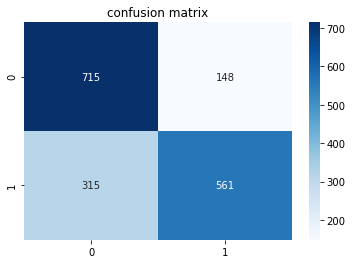

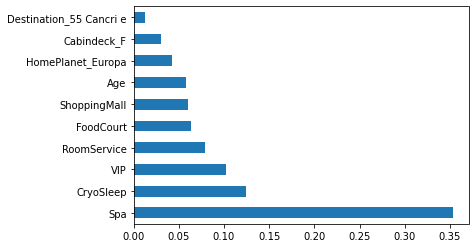

In [34]:
# Import necessary libraries
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Create a SVM model with a linear kernel
svm_model = svm.SVC(kernel='linear')

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = svm_model.predict(X_test)

#train accuracy

print(f"Train : Model accuracy score on train data: {round(cross_val_score(svm_model,X_train,y_train,cv=cv,scoring='accuracy').mean(),15)}")

# Evaluate the accuracy of the SVM model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("TEST Accuracy:", accuracy)

sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap='Blues').set(title="confusion matrix")
plt.show()
coefficients_importance=tree.feature_importances_
coefficients_importance=pd.Series(coefficients_importance,index=X.columns.values).sort_values(ascending=False)[:10]
coefficients_importance.plot(kind='barh')
plt.show()

**KNN REGRESSION**


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print(f"Train : Model accuracy score on train data: {round(cross_val_score(knn_model,X_train,y_train,cv=cv,scoring='accuracy').mean(),15)}")

# Evaluate the accuracy of the knn model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("TEST Accuracy:", accuracy)

Train : Model accuracy score on train data: 0.734398936637893
TEST Accuracy: 0.7337550316273721


In [32]:
y_predicted1=cat_pred
y_predicted1

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
t=pd.read_csv(r'./test.csv')
t=pd.DataFrame(data=t)
submission = pd.DataFrame({
    "PassengerId": t["PassengerId"],
    "Transported": y_predicted1.tolist()
})
submission = submission.replace({0: False, 1: True})
submission.to_csv("submission5.csv", index = False)

submission = pd.read_csv("submission5.csv")
submission.head()

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False